<!--BOOK_INFORMATION-->
<img align="left" style="padding-right:10px;" src="figures/PHydro-cover-small.png">
*This is the Jupyter notebook version of the [Python in Hydrology](http://www.greenteapress.com/pythonhydro/pythonhydro.html) by Sat Kumar Tomer.*
*Source code is available at [code.google.com](https://code.google.com/archive/p/python-in-hydrology/source).*

*The book is available under the [GNU Free Documentation License](http://www.gnu.org/copyleft/fdl.html). If you have comments, corrections or suggestions, please send email to satkumartomer@gmail.com.*

<!--NAVIGATION-->
< [Linear Regression](05.07-Linear-Regression.ipynb) | [Contents](Index.ipynb) | [Interpolation](05.09-Interpolation.ipynb) >

## 5.8 多项式回归

我们可以使用`np.polyfit`进行多项式回归。这提供了拟合系数。我们可以将多项式的阶次定义为`np.polyfit`函数的第三个参数。首先，我们生成一个二次多项式($y=1+2x-3x^2$)，然后我们为它添加噪音。

In [1]:
import numpy as np
# 生成数据
x = np.linspace(0,10)
y = 1 + 2*x - 3*x**2 + 15*np.random.randn(50)
# 拟合多项式
z = np.polyfit(x,y,2)
print(z)

[-3.34229752  5.19630246 -4.85795351]


`np.polyfit`函数提供的拟合多项式为$y=4.58+1.34-3.03x^2$,然而真实的多项式系数是不一样的。只有第三个参数是合理计算的。其他两个参数与真实参数相差很远。让我们看看拟合多项式与真实的多项式相比的行为。`np.polyld`函数是用`np.polyfit`返回的拟合系数来评估多项式。图5.14显示了结果图。虽然拟合的系数与真实的系数不同，但拟合的多项式与真实的多项式比较接近。与第二级相关的参数是由`np.polyfit`相当合理的计算，这意味着这是与其他参数相比最敏感的参数。

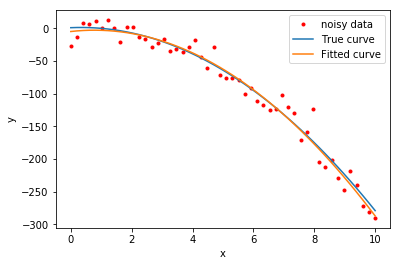

In [3]:
import matplotlib.pyplot as plt
# evaluate polynomial
p = np.poly1d(z)
z_true = np.array([-3, 2, 1]) # coefficient of true polynomial
p_true = np.poly1d(z_true) # true polynomial
# plot
plt.plot(x, y,'.r', label='noisy data')
plt.plot(x, p_true(x), label='True curve')
plt.plot(x, p(x), label='Fitted curve')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()